# Lab exercise 02, Supervised learning, KNN

In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 1, Load and preprocess the data

In [2]:
!wget -q https://patbaa.web.elte.hu/Mammals.xls
data = pd.read_excel('Mammals.xls', sheet_name='All Data', na_values=-999).set_index('Species')

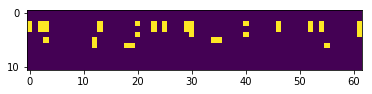

BodyW        0
BrainW       0
SWS         14
PS          12
TS           4
LifeSpan     4
GT           4
PI           0
SEI          0
ODI          0
RND          0
dtype: int64

In [3]:
plt.imshow(data.isna().T)
plt.show()
data.isna().sum() 

In [4]:
na_counts = data.isna().sum()
data = data.drop(na_counts[na_counts > 10].index.values, axis=1)
data = data.fillna(data.mean())

# 2, K-nearest neighbors regression

In [5]:
LifeSpan = data.pop('LifeSpan')

In [6]:
knn = KNeighborsRegressor(n_neighbors=10, weights='uniform', p=2)
lifespan_pred = cross_val_predict(knn, data, LifeSpan, cv=len(data)) # leave-one-out

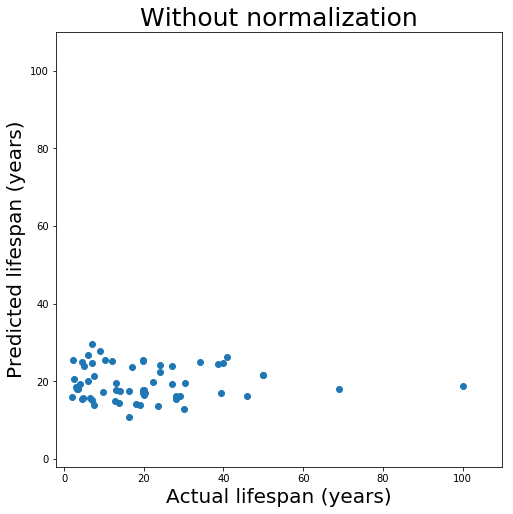

In [7]:
plt.figure(figsize=(8, 8))
plt.scatter(LifeSpan, lifespan_pred)
plt.xlim(-2, 110)
plt.ylim(-2, 110)
plt.xlabel('Actual lifespan (years)', fontsize=20)
plt.ylabel('Predicted lifespan (years)', fontsize=20)
plt.title('Without normalization', fontsize=25)
plt.show()

In [8]:
MAE  = (LifeSpan - lifespan_pred).abs().mean()
corr = np.corrcoef(lifespan_pred, LifeSpan)[0,1]

print('MAE:\t', np.round(MAE, 3), '\nPearson:', np.round(corr, 3))

MAE:	 13.056 
Pearson: -0.01


# 3, K-nearest neighbors regression with normalization.

In [9]:
means, stds = data.mean(), data.std()
normed_data = (data - data.mean())/data.std()

In [10]:
lifespan_pred_norm = cross_val_predict(knn, normed_data, LifeSpan, cv=len(normed_data)) # leave-one-out

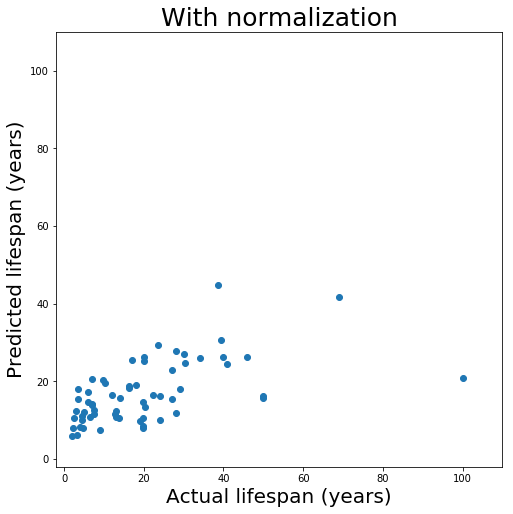

In [11]:
plt.figure(figsize=(8, 8))
plt.scatter(LifeSpan, lifespan_pred_norm)
plt.xlim(-2, 110)
plt.ylim(-2, 110)
plt.xlabel('Actual lifespan (years)', fontsize=20)
plt.ylabel('Predicted lifespan (years)', fontsize=20)
plt.title('With normalization', fontsize=25)
plt.show()

Normalization is important here, because KNN calculates distance. Therefore if a userful variable is in the data but that has much lower scale than a useless one, then the useless one will suppress the useful ones. In our data the RND column had large random numbers and it caused random predictions without normalization.

In [12]:
MAE  = (LifeSpan - lifespan_pred_norm).abs().mean()
corr = np.corrcoef(lifespan_pred_norm, LifeSpan)[0,1]

print('MAE:\t', np.round(MAE, 3), '\nPearson:', np.round(corr, 3))

MAE:	 9.525 
Pearson: 0.573


In [13]:
errors = (LifeSpan - lifespan_pred_norm).sort_values()
errors.head(2), errors.tail(2)

(Species
 Eastern American mole    -14.653276
 Rock hyrax (Hetero. b)   -13.647759
 Name: LifeSpan, dtype: float64, Species
 Echidna       34.320000
 Man           79.254483
 Name: LifeSpan, dtype: float64)

#### Man lives way longer as expected and Eastern American mole dies too early

In [14]:
MAEs = {}
for k in [1, 5, 10, 15]:
    knn = KNeighborsRegressor(n_neighbors=k, weights='uniform', p=2)
    preds = cross_val_predict(knn, normed_data, LifeSpan, cv=len(data)) # leave-one-out
    MAEs[k] = (LifeSpan - preds).abs().mean()

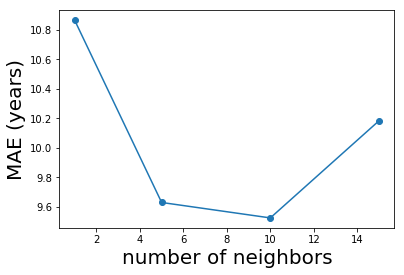

In [15]:
x, y= zip(*MAEs.items())
plt.plot(x, y, 'o-')
plt.xlabel('number of neighbors', fontsize=20)
plt.ylabel('MAE (years)', fontsize=20)
plt.show()

# 4, K-nearest neighbors regression by hand. You may use only numpy and pandas for this task.

In [16]:
Man               = normed_data[normed_data.index == 'Man   '].values # trailing whitespaces... Excel
manfree_data      = normed_data[normed_data.index != 'Man   '].values # might .strip() them
manfree_lifespans = LifeSpan[normed_data.index != 'Man   '].values

In [17]:
distances = ((manfree_data - Man)**2).sum(1)**0.5 # Euclidean distance

In [18]:
manfree_lifespans[distances <= sorted(distances)[9]].mean() # mean lifespan of the 10 closest one

20.74551724137931

In [19]:
preds = pd.DataFrame({'Actual_lifespans':LifeSpan, 'Predicted':lifespan_pred_norm})
preds[preds.index == 'Man   '] # prediction from the 3,A

,Actual_lifespans,Predicted
Species,,
Man,100.0,20.745517
